In [28]:
import numpy             as np
import tables            as tb
import pandas            as pd
import matplotlib.pyplot as plt

from matplotlib.colors import LogNorm

from invisible_cities.reco .dst_functions import load_dst
from invisible_cities.icaro.hst_functions import labels

%matplotlib inline

plt.rcParams["figure.figsize"] = 12, 8
plt.rcParams[  "font.size"   ] = 15

In [2]:
f = tb.open_file("/Users/Gonzalo/github/NEXTdata/Th/pyt_combined_4735.h5")
c = f.root.Reco.Reco.cols

(hit_x,
 hit_y,
 hit_z) = c.hit_position[:].T
hit_r   = np.sqrt(hit_x**2 + hit_y**2)

df = pd.DataFrame({
    "evt"   : c.event_indx[:],
    "nhits" : c.nof_hits  [:],
    "hit_no": c.hit_indx  [:],
    "x"     : hit_x,
    "y"     : hit_y,
    "z"     : hit_z,
    "r"     : hit_r,
    "e"     : c.hit_energy[:]})

In [3]:
np.count_nonzero(np.diff(df.z) == 0)/df.z.size

0.4072029188692502

In [4]:
one_hit_per_slice = 0
for i, subdf in df.groupby("evt"):
    one_hit_per_slice += int(np.all(np.diff(subdf.z.values) > 0))

In [5]:
one_hit_per_slice, len(set(df.evt)), one_hit_per_slice/len(set(df.evt))

(5344, 276464, 0.019329822327681)

In [31]:
DX_consecutive   = []
DY_consecutive   = []
PX_consecutive   = []
PY_consecutive   = []
ABSR_consecutive = []

DX_same   = []
DY_same   = []
ABSR_same = []

mod       = len(df) // 10
current_z = None
for i in df.index[:-1]:
    if not i % mod: print(10 * i // mod, "%")

    if df.evt.values[i+1] != df.evt.values[i]:
        current_z = None
        continue

    dx = df.x.values[i+1] - df.x.values[i]
    dy = df.y.values[i+1] - df.y.values[i]
    rr =                    df.r.values[i]

    if df.z.values[i] == current_z:
        DX_same  .append(dx)
        DY_same  .append(dy)
        ABSR_same.append(rr)
        continue

    current_z = df.z.values[i]
    if df.z.values[i+1] - df.z.values[i] > 2.5:
        continue

    DX_consecutive  .append(dx)
    DY_consecutive  .append(dy)
    ABSR_consecutive.append(rr)

#DX_consecutive = np.abs (DX_consecutive)
#DY_consecutive = np.abs (DY_consecutive)
DR_consecutive = np.sqrt(DX_consecutive**2 +
                         DY_consecutive**2)

#DX_same = np.abs (DX_same)
#DY_same = np.abs (DY_same)
DR_same = np.sqrt(DX_same**2 +
                  DY_same**2)

0 %
10 %
20 %
30 %
40 %
50 %
60 %
70 %
80 %
90 %
100 %


TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

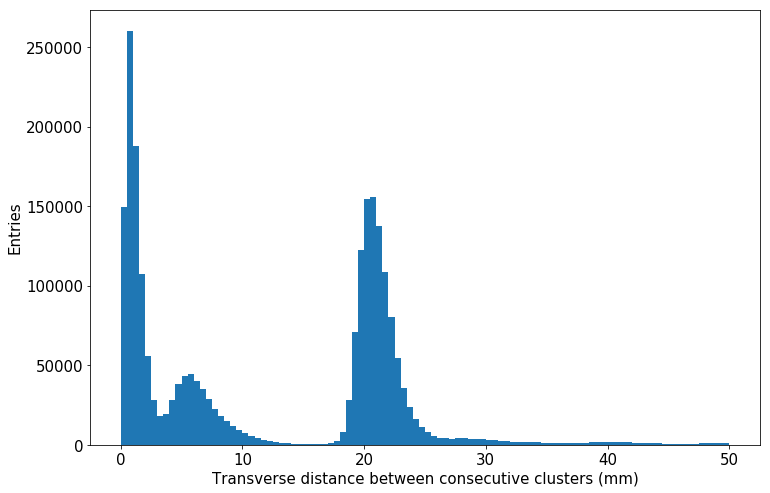

In [29]:
y, x, _ = plt.hist(DR_consecutive, 100, (0, 50))
labels("Transverse distance between consecutive clusters (mm)", "Entries")

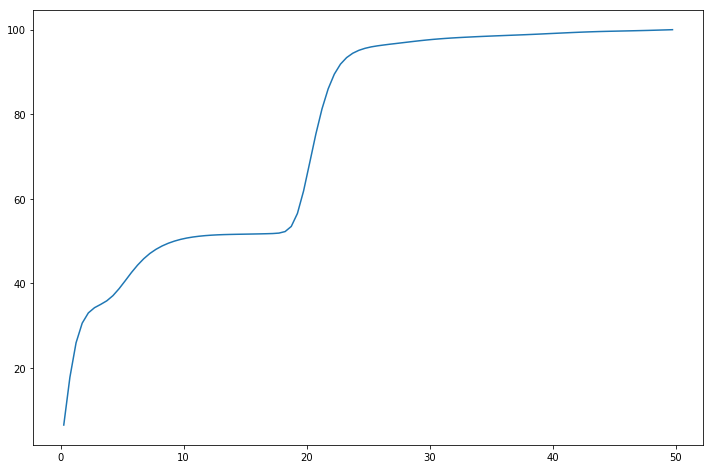

In [19]:
plt.plot(x[:-1] + np.diff(x)/2, 100*np.cumsum(y)/np.sum(y))

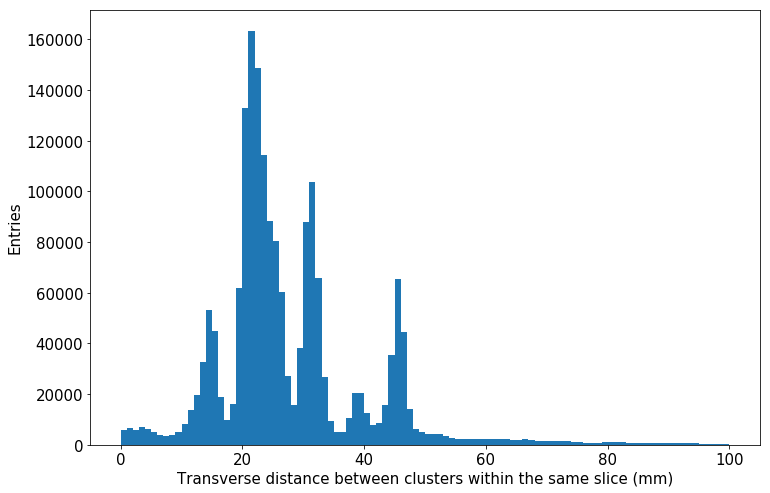

In [30]:
y, x, _ = plt.hist(DR_same, 100, (0, 100))
labels("Transverse distance between clusters within the same slice (mm)", "Entries")

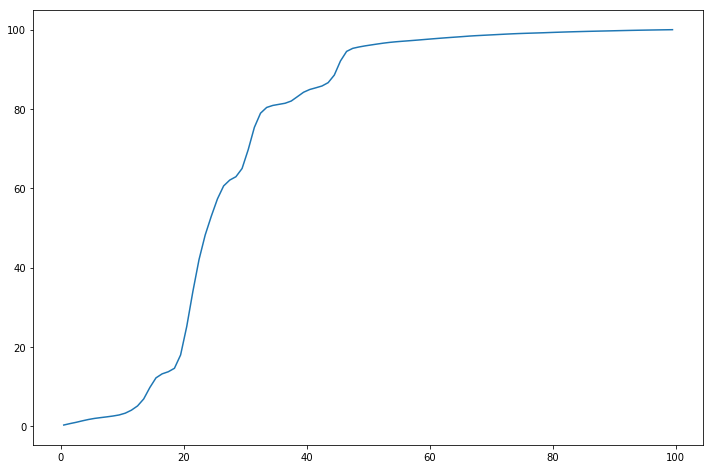

In [21]:
plt.plot(x[:-1] + np.diff(x)/2, 100*np.cumsum(y)/np.sum(y))

In [ ]:
plt.hist2d(DX_consecutive, DY_consecutive, 100, ((-50, 50),(-50, 50)), norm=LogNorm())
plt.colorbar()

In [ ]:
plt.hist2d(DX_same, DY_same, 100, ((-100, 100),(-100, 100)), norm=LogNorm())
plt.colorbar()

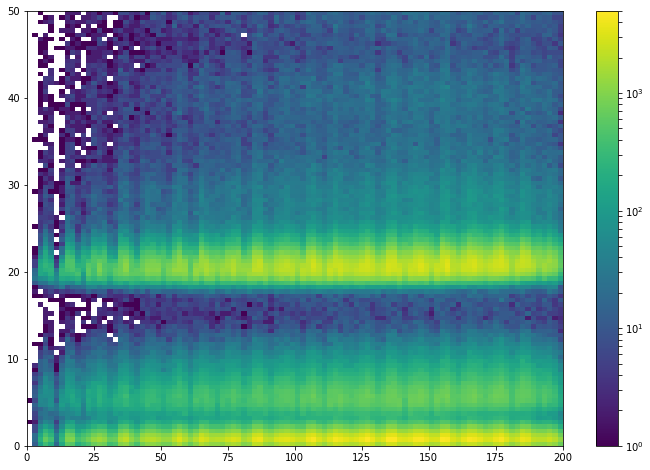

In [24]:
plt.hist2d(ABSR_consecutive, DR_consecutive, 100, ((0, 200),(0, 50)), norm=LogNorm())
plt.colorbar()

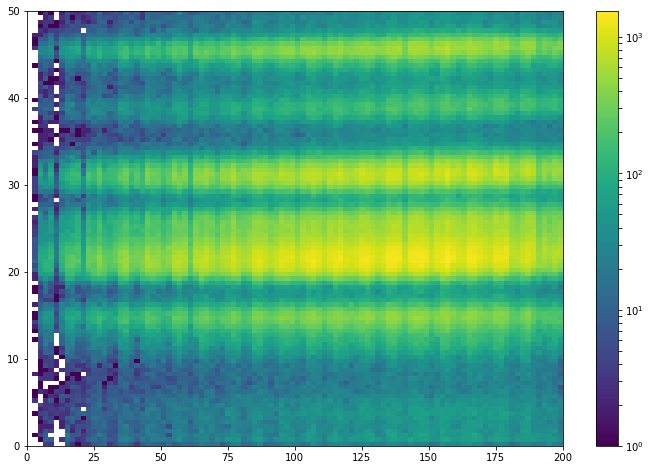

In [25]:
plt.hist2d(ABSR_same, DR_same, 100, ((0, 200),(0, 50)), norm=LogNorm())
plt.colorbar()